#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


In [12]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread('plaksha_Faculty.jpg')
  
## Convert the image to grayscale

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))

# Define the text and font parameters
text = "Face" ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.5  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 1  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x, y-5), font, font_scale, font_color, font_thickness)

## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow(f"Total number of face detected are {len(faces_rect)}", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

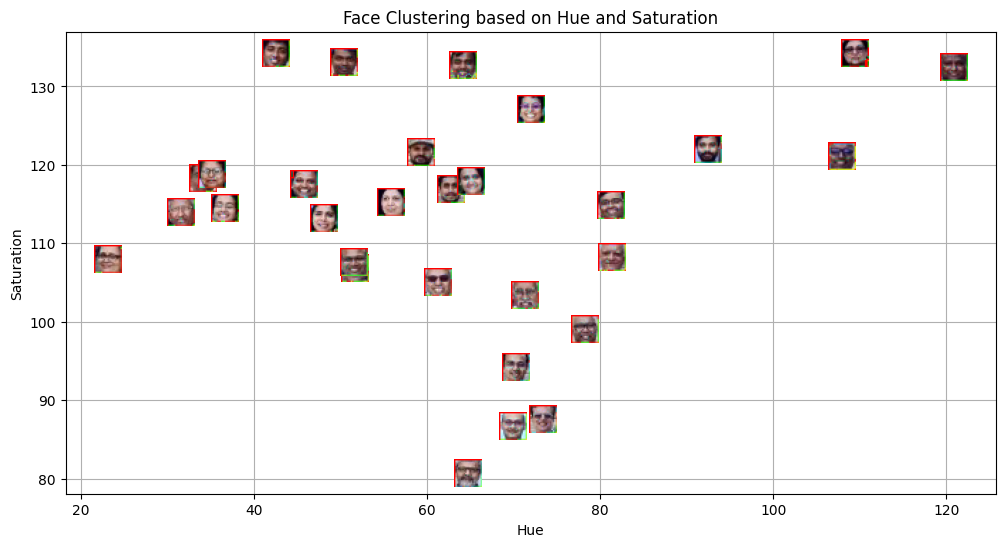

In [13]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  # convert BGR → HSV

hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(hue_saturation)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x, y, w, h) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])

# Labels and formatting
plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Face Clustering based on Hue and Saturation")
plt.grid()
plt.show()


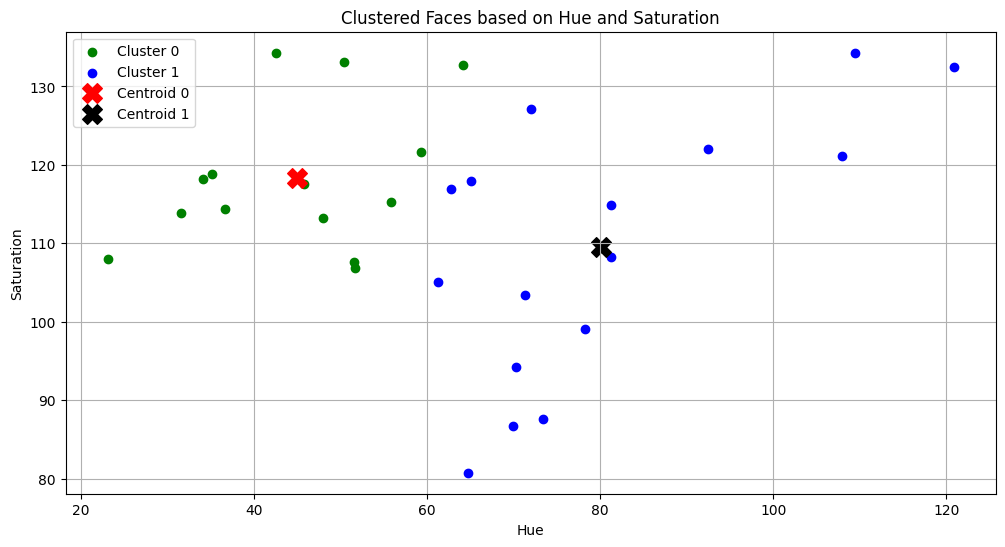

In [14]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Scatter plot
fig, ax = plt.subplots(figsize=(12, 6))

for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')

cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate centroids
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

# Plot centroids
plt.scatter(centroid_0[0], centroid_0[1], color='red', marker='X', s=200, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], color='black', marker='X', s=200, label='Centroid 1')

# Labels and formatting
plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Clustered Faces based on Hue and Saturation")
plt.legend()
plt.grid()
plt.show()


In [28]:
# Read the template image
template_img = cv2.imread('Dr_Shashi_Tharoor.jpg')

# Convert to grayscale and detect faces
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(template_gray, 1.05, 4)

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

# Display result
cv2.imshow("Template Face Detection", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


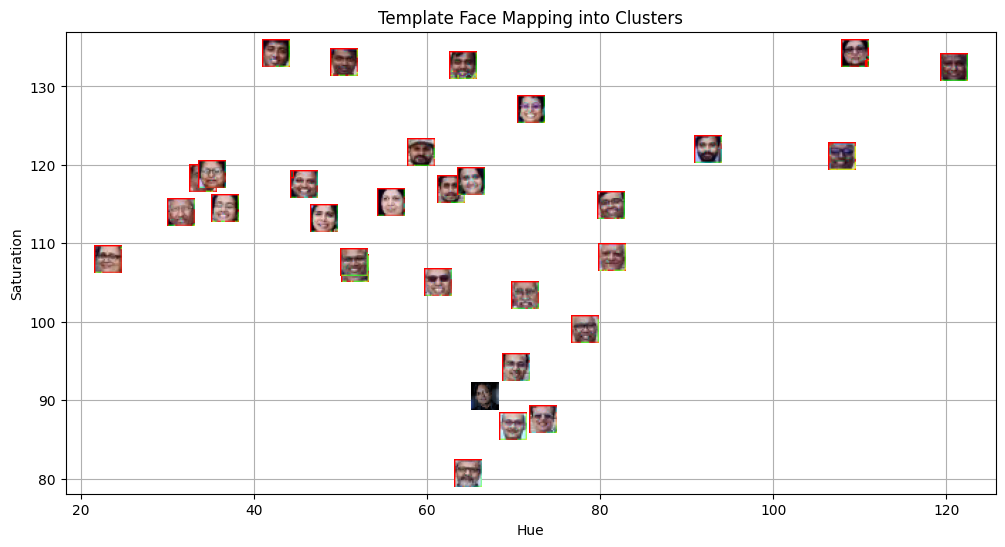

In [16]:
# Convert the template image to HSV color space
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot clustered faces
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the predicted cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'

im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

# Labels and formatting
plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Template Face Mapping into Clusters")
plt.grid()
plt.show()


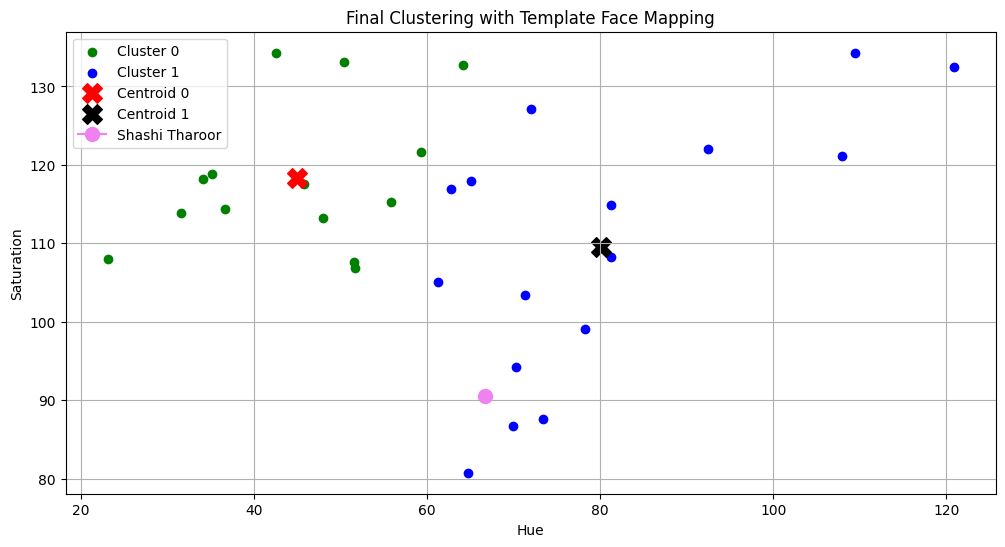

In [25]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Scatter plot
fig, ax = plt.subplots(figsize=(12, 6))

for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label='Cluster 1')

# Calculate centroids
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

# Plot centroids
plt.scatter(centroid_0[0], centroid_0[1], marker='X', s=200, color='red', label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], marker='X', s=200, color='black', label='Centroid 1')

# Plot template face point
plt.plot(template_hue, template_saturation, marker='o', c='violet', markersize=10, label='Shashi Tharoor')


# Labels and formatting
plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Final Clustering with Template Face Mapping")
plt.legend()
plt.grid()
plt.show()


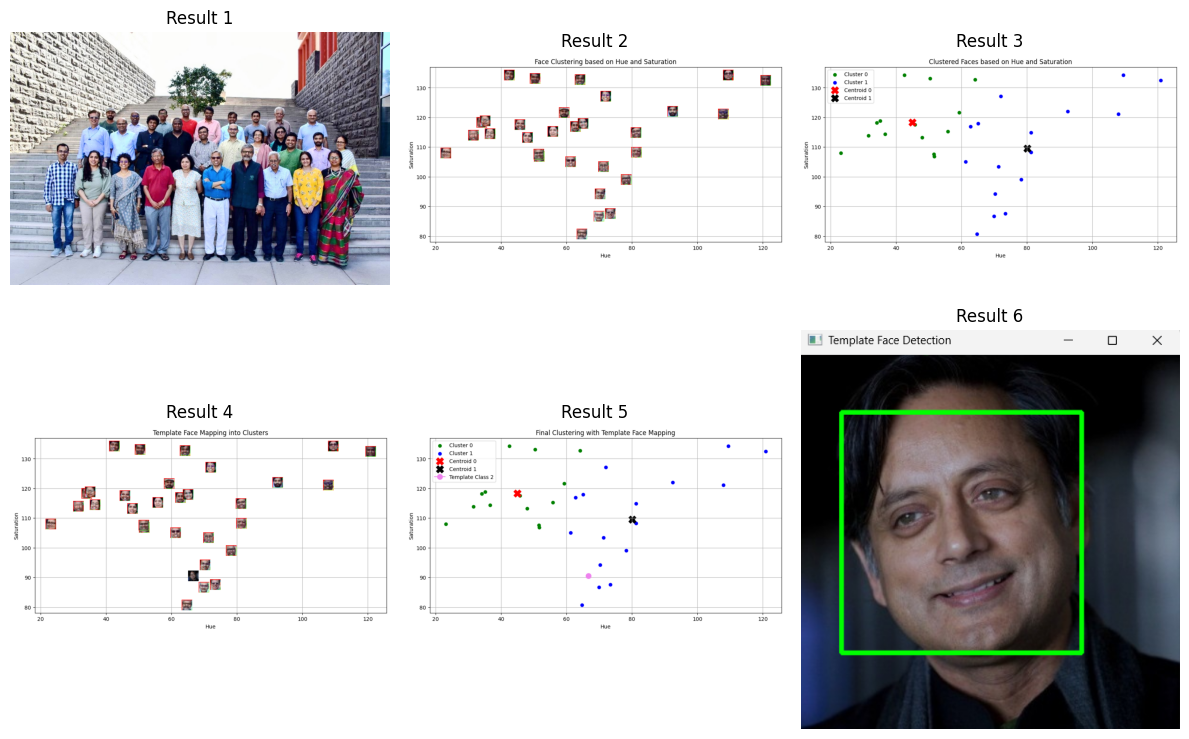

In [29]:
from PIL import Image
import matplotlib.pyplot as plt

images = ["Plaksha_Faculty.jpg","image_2.png","image_3.png","image_4.png","image_5.png","shashi.png"]

plt.figure(figsize=(12,8))

for i, img_path in enumerate(images):
    img = Image.open(img_path)
    plt.subplot(2,3,i+1)
    plt.imshow(img)
    plt.title(f"Result {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

#### 2. What are some real-world applications of distance-based classification algorithms? 

#### 3. Explain various distance metrics. 

#### 4. What is the role of cross validation in model performance? 

#### 5. Explain variance and bias in terms of KNN? 

Q1)Some of the most common distance metrics are Euclidean distance, Manhattan distance, and Minkowski distance. Apart from these, Cosine similarity and Hamming distance are also used depending on the type of data. Euclidean is mostly used for continuous data, while Hamming is useful for categorical or binary data. The choice of distance metric really depends on the problem and feature type.

Q2)Distance-based algorithms like KNN are used in face recognition, recommendation systems, medical diagnosis, and image classification. For example, in face recognition, similar faces are grouped using distance between features. In e-commerce, products are recommended based on similarity to previous purchases. They are also used in detecting spam emails and identifying handwritten digits.

Q3)Euclidean distance measures straight-line distance between two points. Manhattan distance calculates distance by summing absolute differences along each dimension. Minkowski distance is a generalized form of both Euclidean and Manhattan. Cosine similarity measures the angle between two vectors, which is useful in text analysis. Hamming distance counts how many positions are different between two strings or binary vectors.

Q4)Cross-validation helps us check how well our model will perform on unseen data. Instead of testing on just one split, the dataset is divided into multiple parts and the model is trained and tested multiple times. This gives a more reliable estimate of performance and reduces overfitting. It basically ensures the model is not just memorizing the training data.

Q5)In KNN, small values of K lead to low bias but high variance, meaning the model fits training data very closely but may not generalize well. On the other hand, large values of K give high bias but low variance, meaning the model becomes more smooth but may miss important patterns. So choosing the right K is a balance between bias and variance to get the best performance.